In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data = 'fakebills.csv'
df = pd.read_csv(data)

In [ ]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [ ]:
col_names = df.columns

col_names

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df['is_genuine'].value_counts()

1    1000
2     500
Name: is_genuine, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   int64  
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 82.2 KB


In [ ]:
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [ ]:
df['margin_low']=df['margin_low'].fillna(df['margin_low'].median())

In [ ]:
df.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [ ]:
df['is_genuine'].value_counts()/float(len(df))

1    0.666667
2    0.333333
Name: is_genuine, dtype: float64

In [ ]:
round(df.describe(),2)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00
mean,1.33,171.96,104.03,103.92,4.48,3.15,112.68
std,0.47,0.31,0.30,0.33,0.66,0.23,0.87
min,1.00,171.04,103.14,102.82,2.98,2.27,109.49
25%,1.00,171.75,103.82,103.71,4.03,2.99,112.03
50%,1.00,171.96,104.04,103.92,4.31,3.14,112.96
75%,2.00,172.17,104.23,104.15,4.86,3.31,113.34
max,2.00,173.01,104.88,104.95,6.90,3.91,114.44


Text(0, 0.5, 'length')

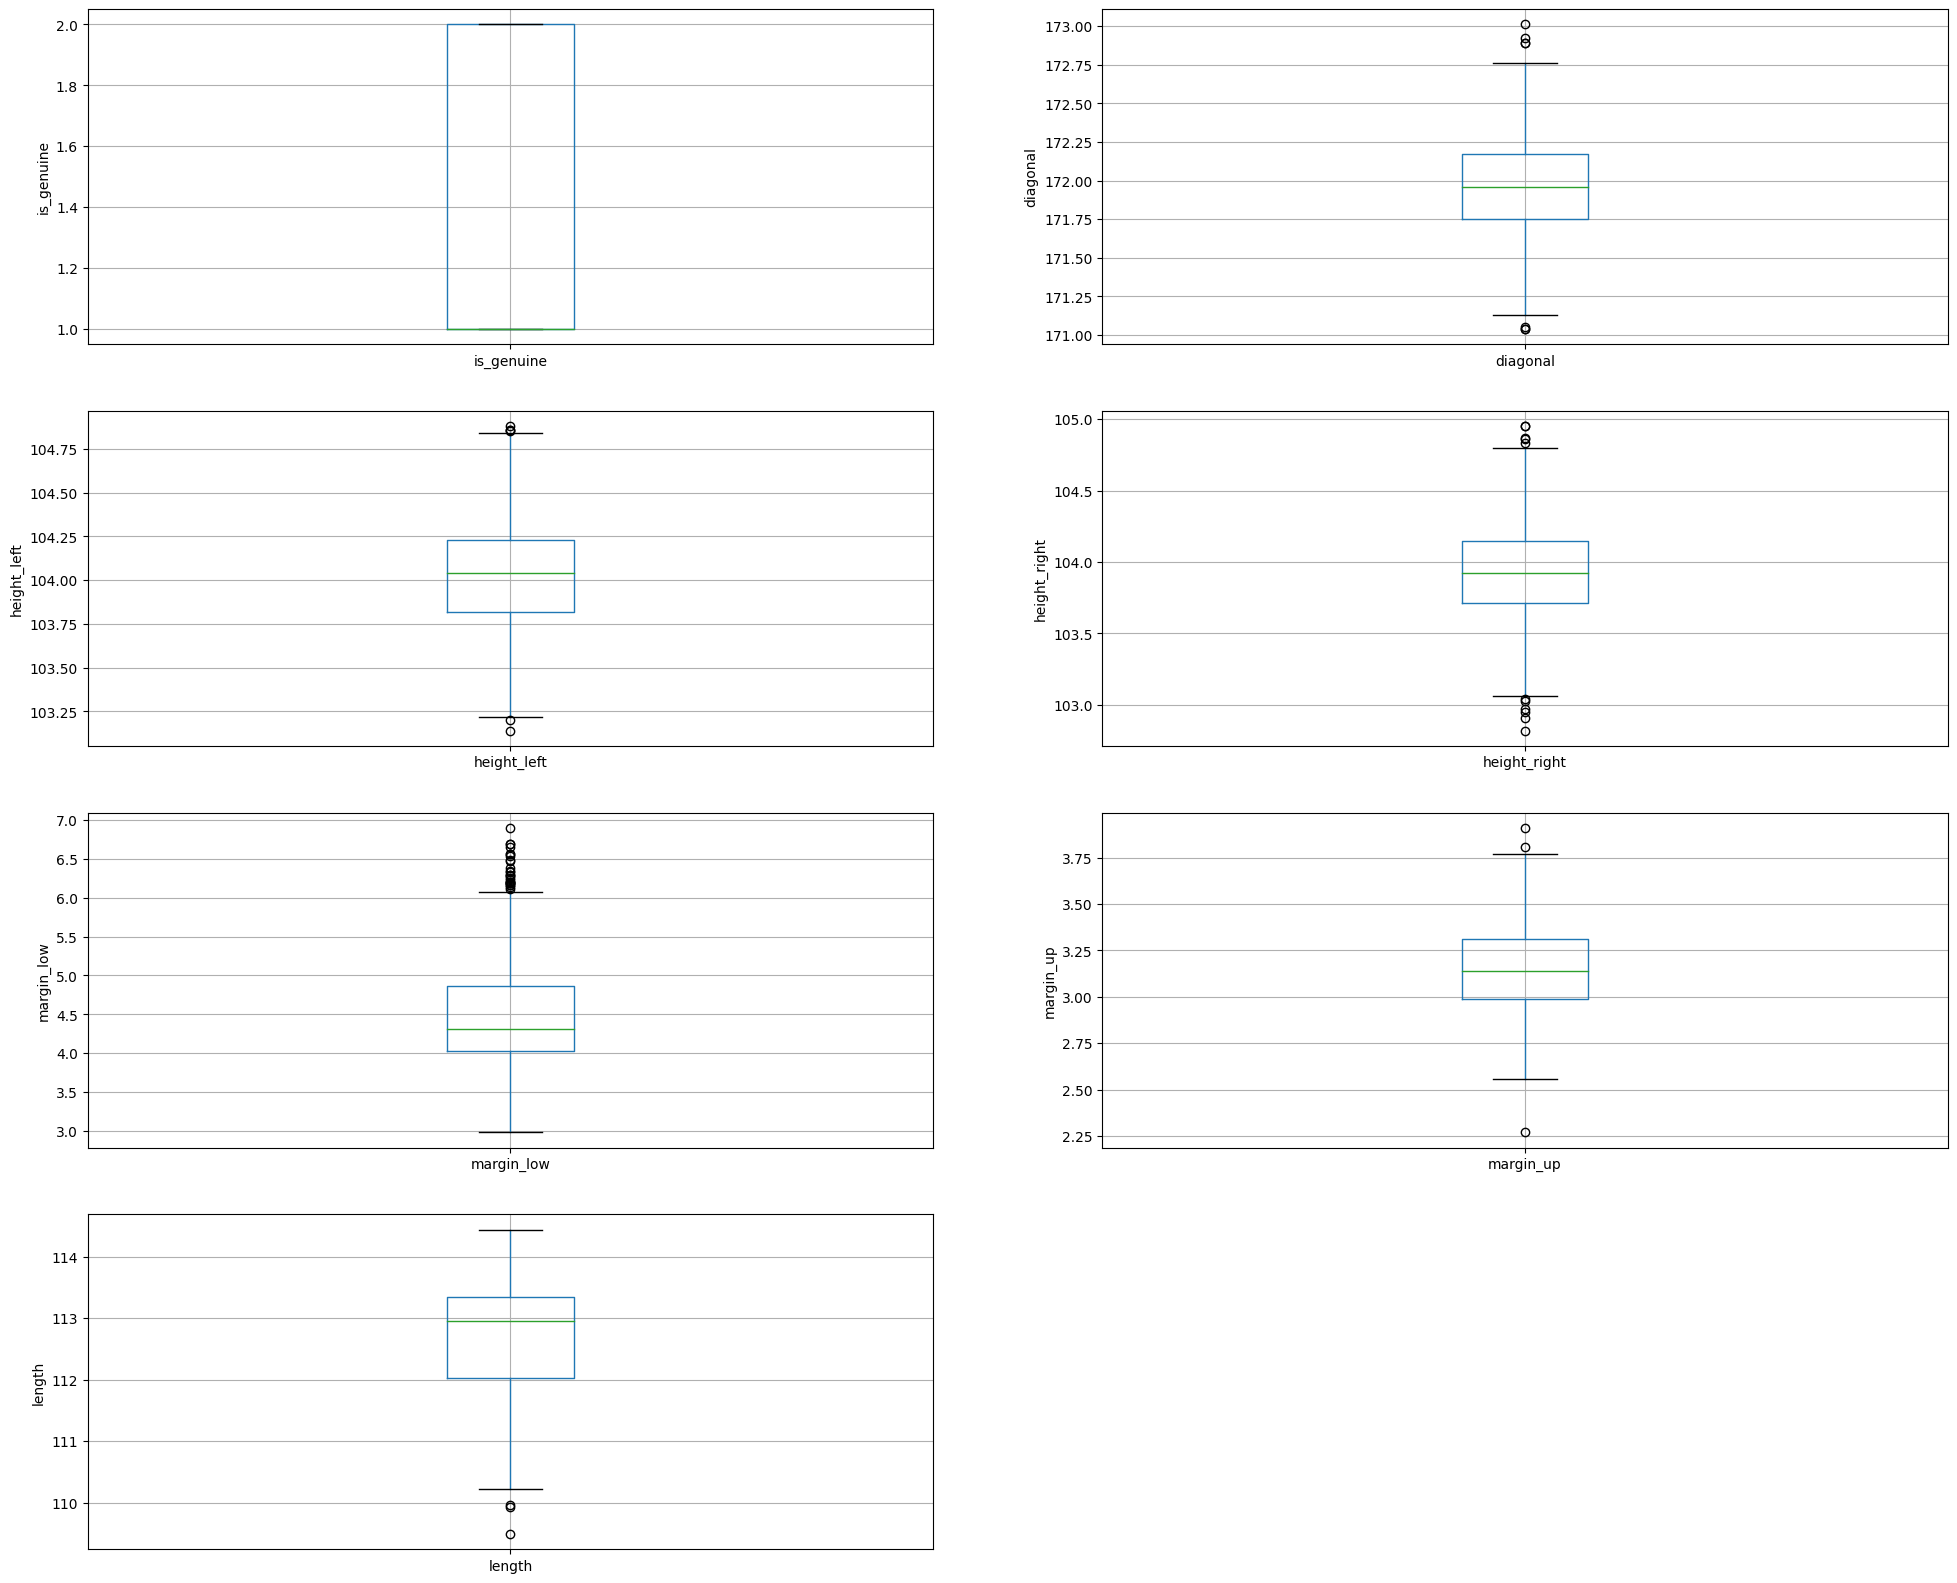

In [ ]:
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='is_genuine')
fig.set_title('')
fig.set_ylabel('is_genuine')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='diagonal')
fig.set_title('')
fig.set_ylabel('diagonal')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='height_left')
fig.set_title('')
fig.set_ylabel('height_left')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='height_right')
fig.set_title('')
fig.set_ylabel('height_right')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='margin_low')
fig.set_title('')
fig.set_ylabel('margin_low')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='margin_up')
fig.set_title('')
fig.set_ylabel('margin_up')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='length')
fig.set_title('')
fig.set_ylabel('length')




Text(0, 0.5, 'Y-axis')

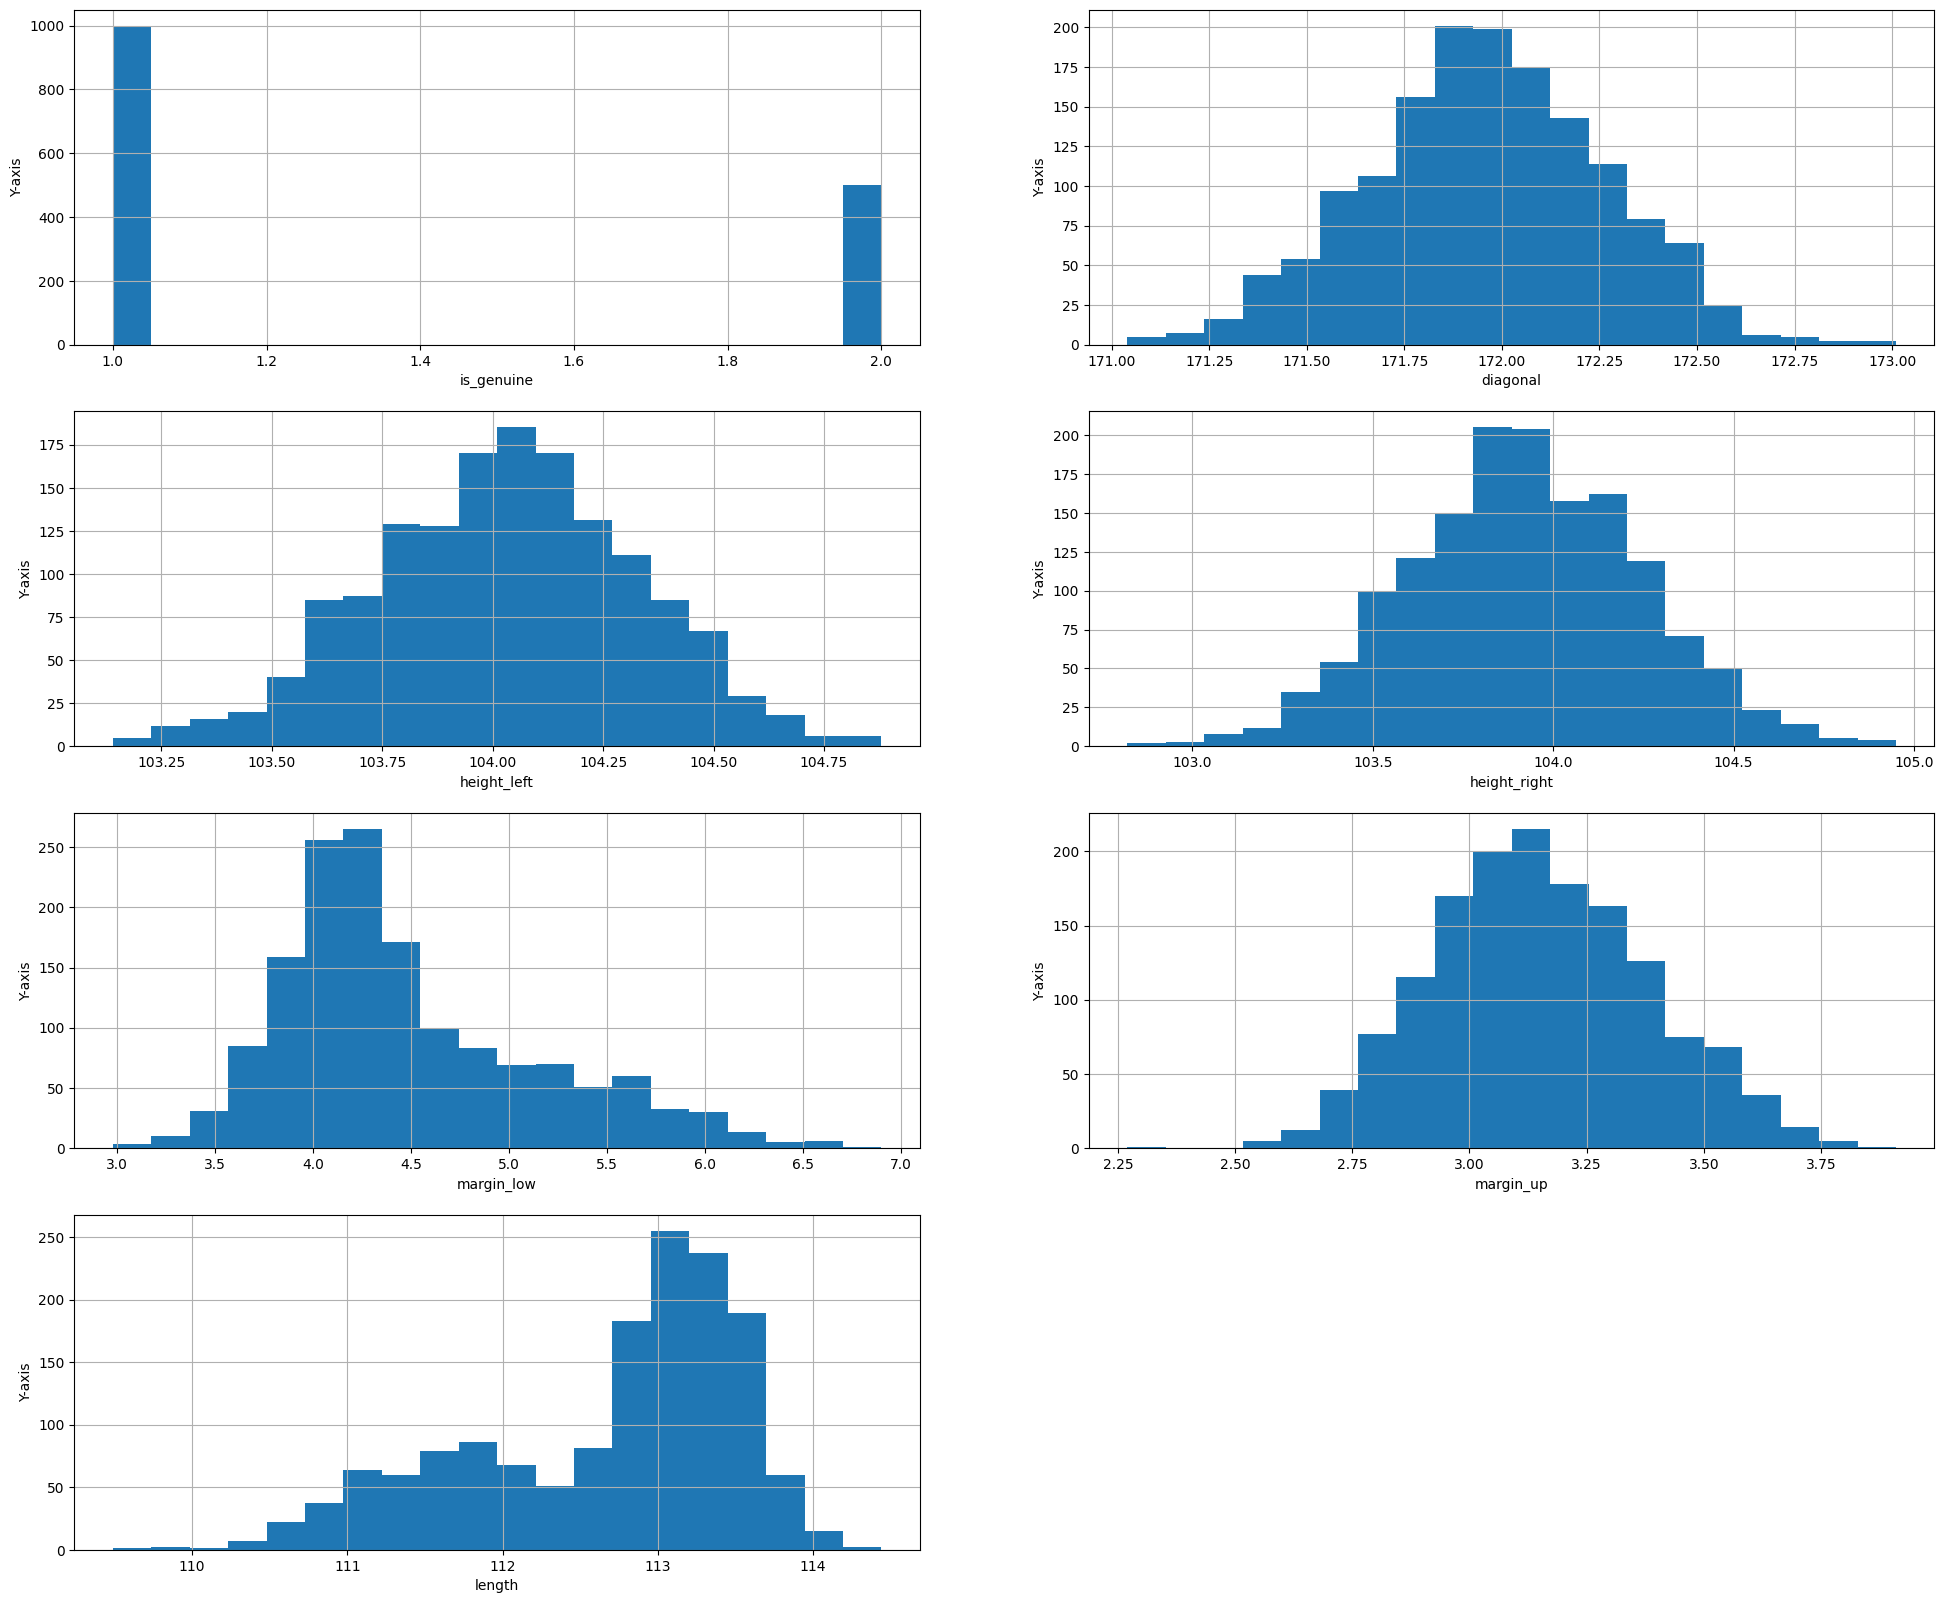

In [ ]:
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['is_genuine'].hist(bins=20)
fig.set_xlabel('is_genuine')
fig.set_ylabel('Y-axis')


plt.subplot(4, 2, 2)
fig = df['diagonal'].hist(bins=20)
fig.set_xlabel('diagonal')
fig.set_ylabel('Y-axis')


plt.subplot(4, 2, 3)
fig = df['height_left'].hist(bins=20)
fig.set_xlabel('height_left')
fig.set_ylabel('Y-axis')



plt.subplot(4, 2, 4)
fig = df['height_right'].hist(bins=20)
fig.set_xlabel('height_right')
fig.set_ylabel('Y-axis')



plt.subplot(4, 2, 5)
fig = df['margin_low'].hist(bins=20)
fig.set_xlabel('margin_low')
fig.set_ylabel('Y-axis')



plt.subplot(4, 2, 6)
fig = df['margin_up'].hist(bins=20)
fig.set_xlabel('margin_up')
fig.set_ylabel('Y-axis')



plt.subplot(4, 2, 7)
fig = df['length'].hist(bins=20)
fig.set_xlabel('length')
fig.set_ylabel('Y-axis')


In [ ]:
X = df.drop(['is_genuine'], axis=1)

y = df['is_genuine']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_train.shape, X_test.shape

((1050, 6), (450, 6))

In [ ]:
cols = X_train.columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1.050000e+03,1.050000e+03,1.050000e+03,1.050000e+03,1.050000e+03,1.050000e+03
mean,2.040273e-14,-2.501280e-15,3.071406e-15,-6.970086e-16,2.774500e-16,-2.206066e-15
std,1.000477e+00,1.000477e+00,1.000477e+00,1.000477e+00,1.000477e+00,1.000477e+00
min,-2.983629e+00,-3.040901e+00,-3.134449e+00,-2.079726e+00,-3.860787e+00,-3.717975e+00
25%,-6.561811e-01,-7.130072e-01,-6.674791e-01,-6.809353e-01,-6.926696e-01,-7.388196e-01
50%,-5.619593e-04,5.901244e-03,9.575861e-03,-2.505380e-01,-7.664666e-02,3.162376e-01
75%,6.796429e-01,6.905759e-01,7.255420e-01,5.449283e-01,7.153828e-01,7.580246e-01
max,3.474220e+00,2.847301e+00,3.215859e+00,3.730636e+00,2.915465e+00,1.897370e+00


In [ ]:
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC()


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9978


In [ ]:
y_pred = svc.predict(X_test) #predicting the result
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       293
           2       1.00      0.99      1.00       157

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



[[293   0]
 [  1 156]]
